### Header
Author : Amina Matt    
Date created : 30.11.2021      
Date last modified : 17.12.2021  
Description : Top to bottom approach to select subtopics.

# Women's rights and gender equality quotes

### Librairies

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import nltk #Natural Language Toolkit is a natural language programming library
from nltk.tokenize import word_tokenize
nltk.download('stopwords') #common english words to ignore 
stopwords = nltk.corpus.stopwords.words('english') #list of words such as a, the, and etc..
import random

PATH = 'generated_data/'
pd.options.display.max_colwidth = 350

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aminamatt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load dataframe

In [6]:
# Concatenate into one dataframes the dataframes from each pickle file. 
dataframesNames = ('QOI_2015_DF','QOI_2016_DF','QOI_2017_DF','QOI_2018_DF','QOI_2019_DF','QOI_2020_DF')
df = pd.concat([pd.read_pickle(PATH+ fp +'.pkl') for fp in dataframesNames], ignore_index=True)

## keywords subcategories

In [7]:
KEYWORDS_WAGES_EQUALITY =(
    'equal pay',
    'Equal wages',
     'men pay',
     'pay percentage',
)


KEYWORDS_EQUALITY = (
'Equal opportunities',
'Equal rights',
'Equal status',
'Gender equality',
'gender equity',
'gender gap',
 'percentage men',
 'women\'s right',
'Gender discrimination',
 'Men and women',
 'women and men',
 'women oppression',
 'struggle of girls',
 'struggle of women',
 'war against women',
 'oppression of girls',
 'oppression of women',
 'women oppression',
 "women's opression",
 'liberate women',
 'Male oppression',
 'Female oppression',
 'Patriarchal culture',
 'gender equality',
 'women girls',
 'girls women',
 'rates women',
 'women according',
 'share women',
 'women movement',
 'see women',
 'gender stereotypes',
 'sex discrimination',
 'women rights',
 'woman time',
 'based gender',
 'entirely female',
 'women immigration',
 "women participation",
 'women representation',
 'Women empowerment',
 'Women emancipation',)
KEYWORDS_REPRODUCTION_WORK = (
'Exploitation of women',
 'child care',
)
KEYWORDS_SEXUAL = (
'Sexual harrasment',
'abuse of women',
'sexual harassment',
'women victim',
'gender-based violence',
)
KEYWORDS_TRANS = ('trans ','transsexual','transgender','transidentities')
KEYWORDS_ABORTION = ('abortion')
KEYWORDS_INDIGENEOUS = ('Indigenous')
KEYWORDS_REPRESENTATION = ('female mayors','female candidates')
KEYWORDS_FEMONAT = ('Western women',
 'non-western woman',
 'Muslim women',
 'Muslim woman',
 'niqab ban',
 'religious oppression')

## Functions 

In [8]:
def add_subtopic(df):
    '''
    Description: classify quotes into one of the 10 subtopics based on sublist of keywords
    Input: dataframe to categorize
    Output: new colum 'subtopic' with topic name 
    Requirements : -
    Use: - 
    '''
    df['subtopic'] = np.where(df.quotation.str.contains('|'.join(KEYWORDS_FEMONAT)), "Islam",
                 np.where(df.quotation.str.contains('|'.join(KEYWORDS_REPRESENTATION)), "Women\n participation",
                 np.where(df.quotation.str.contains(KEYWORDS_INDIGENEOUS), "Indigenous",
                 np.where(df.quotation.str.contains(KEYWORDS_ABORTION), "Abortion",
                 np.where(df.quotation.str.contains('|'.join(KEYWORDS_TRANS)), "Transidentities",    
                 np.where(df.quotation.str.contains('|'.join(KEYWORDS_SEXUAL)), "Sexual\n violences", 
                 np.where(df.quotation.str.contains('|'.join(KEYWORDS_WAGES_EQUALITY)), "Wages\n equality",
                 np.where(df.quotation.str.contains('|'.join(KEYWORDS_REPRODUCTION_WORK)), "Reproductive\n work",  
                 np.where(df.quotation.str.contains('|'.join(KEYWORDS_EQUALITY)),"Equal\n opportunities","Other")))))))))
    return df

#### Manual topic classification

In [9]:
#add manual subtopic to the dataframe 
add_subtopic(df)
df.head(100)[['quotation','subtopic']]

,quotation,subtopic
0,Anything less than women winning 50 per cent of new seats will be a loss not only for a progressive city's progress towards true gender equality but it would also be a loss for good governance in the ACT.,Equal\n opportunities
1,"I'd like to congratulate all the winners and finalists on their success. They have demonstrated clear leadership by moving women's progression from a `diversity' initiative to a core business priority. Achieving gender equality is only possible when men and women work together at every level, creating real change.",Equal\n opportunities
2,"I think what Deepika has spoken in the video makes sense. I do understand the counter argument too where everyone has been saying that had men said the same lines about having sex outside marriage being their choice, they would have been branded idiots or ass **** s. However, we still do have a clear cut demarcation or boundary as to what men a...",Equal\n opportunities
3,"if advocating for equal pay for equal work is playing the gender card, deal me in. I am ready to play as hard as I can.",Wages\n equality
4,"Men and women are understandably upset if they see a company close down and jobs lost. It's only natural people would look around and in their distress they find something or someone able to blame,",Equal\n opportunities
...,...,...
95,"This is an extremely important rhetorical shift - the move from child care as a mushy, emotional, frivolous extra, to a serious imperative.",Reproductive\n work
96,"The terror of being accused of sexual harassment is now so common it has its own term, `backlash stress '",Sexual\n violences
97,"They took everybody in Quebec. So these results can be driven by those who didn't go to child care. We can't say it's child care,",Reproductive\n work
98,"We're very excited to do work with these amazing women and men and to see the amazing talent LA has to offer. At Apple Model Management, you're a model first, and a trans person second,",Transidentities


#### Feminicde sidenote

In [ ]:
df['quotation'].str.contains('feminicide').sum()

2

### Categorization based on manual categories

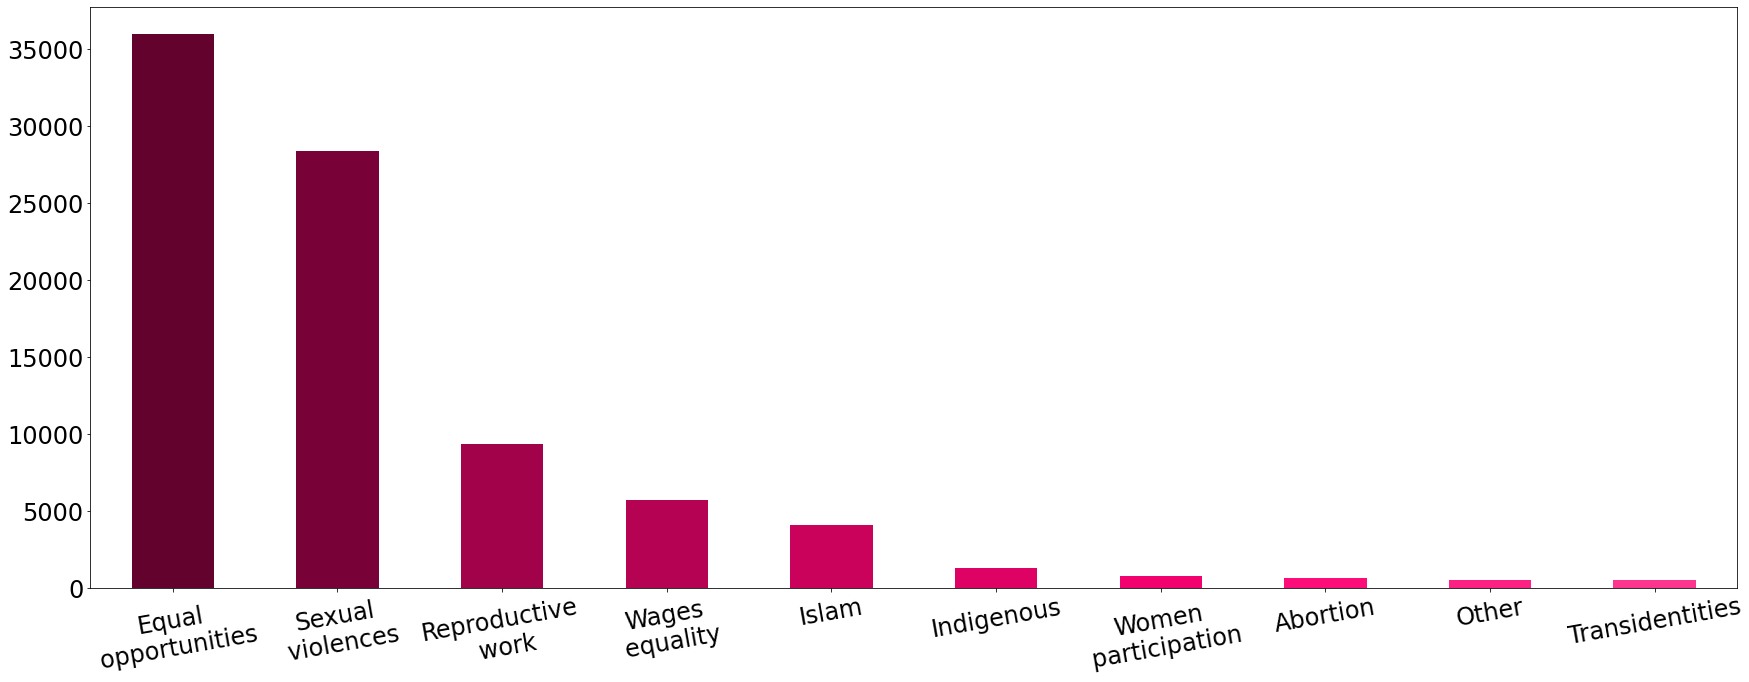

In [12]:
# plot parameters
mpl.rcParams['font.sans-serif'] = 'Lato'
plt.rcParams['font.size'] = 24
plt.rcParams["figure.figsize"] = (25,10)
# Hide grid lines

#count subtopic occurences
toPlot =  df['subtopic'].value_counts().sort_values(ascending=False)

#plot
tt =toPlot.plot.bar(x='Target Value', y='Number of Occurrences',rot = 10,
                    color=['#64022E', '#780237', '#A1024A', '#B60253', '#CA025C',
                          '#DE0265', '#F2026E', '#FD0D79', '#FD2184', '#FD358F']
                    ).get_figure()
#color='#C7264E'
plt.tight_layout()
tt.savefig("img/all_subtopics_barplot.png")